In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker
from scipy import optimize

In [6]:
diamante=pd.read_csv("diamante/conv_ALAT/volEtot.dat",sep='\s+',header=None)
diamante.columns=['ALAT','Volumen','Energía total']

In [7]:
HCP=pd.read_csv("HCP/volEtot.dat",sep='\s+',header=None)
HCP.columns=['ALAT','Volumen','Energía total']

In [8]:
beta_tin=pd.read_csv("beta-tin/volEtot.dat",sep='\s+',header=None)
beta_tin.columns=['ALAT','Volumen','Energía total']

In [9]:
def Birch_Murnaghan(x, E0, B0, V0, B0p):
    C=9./16.
    return E0+C*V0*B0*(B0p*((V0/x)**(2/3)-1.0)**3.+((V0/x)**(2./3.)-1.0)**2.*(6.0-4.0*(V0/x)**(2./3.)))

In [10]:
x_data=diamante["Volumen"]
y_data=diamante["Energía total"]
diamparams, diamparams_covariance = optimize.curve_fit(Birch_Murnaghan, x_data, y_data,p0=[1,1,15,1])

print("Parámetros de diamante:")
print("E0 = {:6.4f}".format(diamparams[0]))
print("B0 = {:6.4f}".format(diamparams[1]))
print("V0 = {:6.4f}".format(diamparams[2]))
print("B0' = {:6.4f}".format(diamparams[3]))

x_data=HCP["Volumen"]
y_data=HCP["Energía total"]
HCPparams, HCPparams_covariance = optimize.curve_fit(Birch_Murnaghan, x_data, y_data,p0=[1,1,15,1])

print("\nParámetros de HCP:")
print("E0 = {:6.4f}".format(HCPparams[0]))
print("B0 = {:6.4f}".format(HCPparams[1]))
print("V0 = {:6.4f}".format(HCPparams[2]))
print("B0' = {:6.4f}".format(HCPparams[3]))

x_data=beta_tin["Volumen"][:-2]
y_data=beta_tin["Energía total"][:-2]
BTparams, BTparams_covariance = optimize.curve_fit(Birch_Murnaghan, x_data, y_data,p0=[1,1,15,1])

print("\nParámetros de beta-tin:")
print("E0 = {:6.4f}".format(BTparams[0]))
print("B0 = {:6.4f}".format(BTparams[1]))
print("V0 = {:6.4f}".format(BTparams[2]))
print("B0' = {:6.4f}".format(BTparams[3]))

Parámetros de diamante:
E0 = -5.4199
B0 = 0.5201
V0 = 20.6127
B0' = 4.0576

Parámetros de HCP:
E0 = -4.9420
B0 = 0.5907
V0 = 14.3801
B0' = 4.1513

Parámetros de beta-tin:
E0 = -5.1687
B0 = 0.6886
V0 = 15.3618
B0' = 3.9779


In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

In [12]:
npts=100000
xfit=np.linspace(5,30,npts)
HCP_fit=Birch_Murnaghan(xfit,HCPparams[0],HCPparams[1],HCPparams[2],HCPparams[3])
BT_fit=Birch_Murnaghan(xfit,BTparams[0],BTparams[1],BTparams[2],BTparams[3])
diam_fit=Birch_Murnaghan(xfit,diamparams[0],diamparams[1],diamparams[2],diamparams[3])

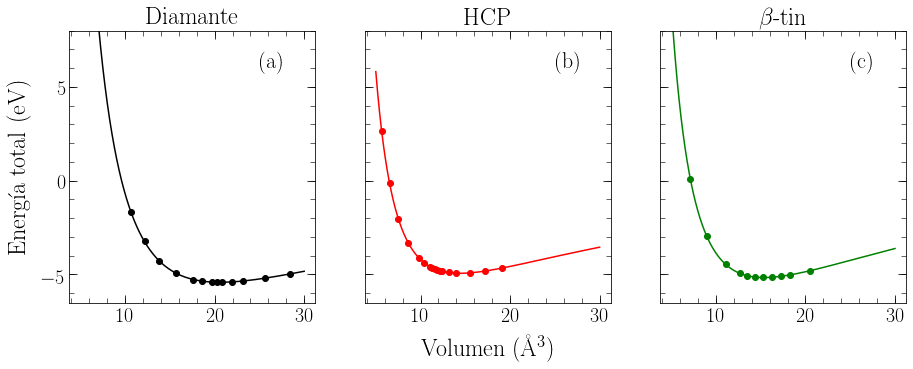

In [26]:
fig,axs=plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
axs[0].text(25,6,"(a)",fontsize=22)
axs[0].set_title(r'Diamante')
axs[0].plot(diamante["Volumen"][:-2],diamante["Energía total"][:-2],'ko',linestyle='None')
axs[0].plot(xfit,diam_fit,'k',linestyle='solid')
axs[0].set_ylabel('Energía total (eV)',fontsize=24,labelpad=10)
axs[0].xaxis.set_major_locator(mticker.MultipleLocator(10));
axs[0].xaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[0].yaxis.set_major_locator(mticker.MultipleLocator(5));
axs[0].yaxis.set_minor_locator(mticker.MultipleLocator(1));
axs[0].tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
axs[0].tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
axs[0].set_ylim(-6.5,8)

axs[1].set_title(r'HCP')
axs[1].text(25,6,"(b)",fontsize=22)
axs[1].plot(HCP["Volumen"],HCP["Energía total"],'ro',linestyle='None')
axs[1].plot(xfit,HCP_fit,'r',linestyle='solid')
axs[1].set_xlabel(r'Volumen (\AA$^3$)',fontsize=24,labelpad=10)
axs[1].xaxis.set_major_locator(mticker.MultipleLocator(10));
axs[1].xaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[1].yaxis.set_major_locator(mticker.MultipleLocator(5));
axs[1].yaxis.set_minor_locator(mticker.MultipleLocator(1));
axs[1].tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
axs[1].tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
    
axs[2].set_title(r'$\beta$-tin')
axs[2].text(25,6,"(c)",fontsize=22)
axs[2].plot(beta_tin["Volumen"][:-2],beta_tin["Energía total"][:-2],'go',linestyle='None')
axs[2].xaxis.set_major_locator(mticker.MultipleLocator(10));
axs[2].xaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[2].yaxis.set_major_locator(mticker.MultipleLocator(5));
axs[2].yaxis.set_minor_locator(mticker.MultipleLocator(1));
axs[2].tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
axs[2].tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
axs[2].plot(xfit,BT_fit,'g',linestyle='solid')

plt.savefig("punto5.eps",bbox_inches='tight')
plt.show()

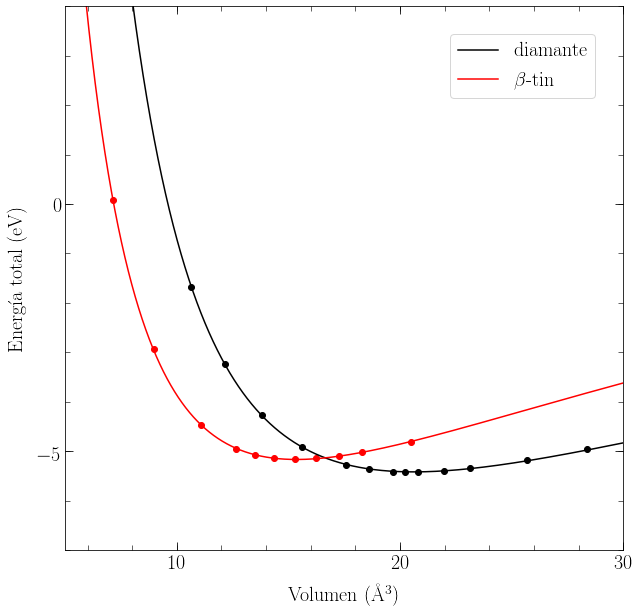

In [36]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
plt.plot(diamante["Volumen"][:-2],diamante["Energía total"][:-2],'ko',linestyle='None',label='')
plt.plot(beta_tin["Volumen"][:-2],beta_tin["Energía total"][:-2],'ro',linestyle='None',label='')
plt.plot(xfit,diam_fit,'k',linestyle='solid',label='diamante')
plt.plot(xfit,BT_fit,'r',linestyle='solid',label=r'$\beta$-tin')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.ylabel('Energía total (eV)',labelpad=10)
plt.xlabel(r'Volumen (\AA$^3$)',labelpad=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(10));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2));
ax.yaxis.set_major_locator(mticker.MultipleLocator(5));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1));
ax.tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
ax.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
#plt.savefig("punto6.eps",bbox_inches='tight')
ax.set_ylim(-7,4)
ax.set_xlim(5,30)
plt.show()